In [90]:
#importing required packages
import pandas as pd
import numpy as np
import missingno as mns
import seaborn as sns
from sklearn import preprocessing

In [91]:
#reading train data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sample =  pd.read_csv('../input/sample_submission.csv')

In [92]:
#top 5 rows
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


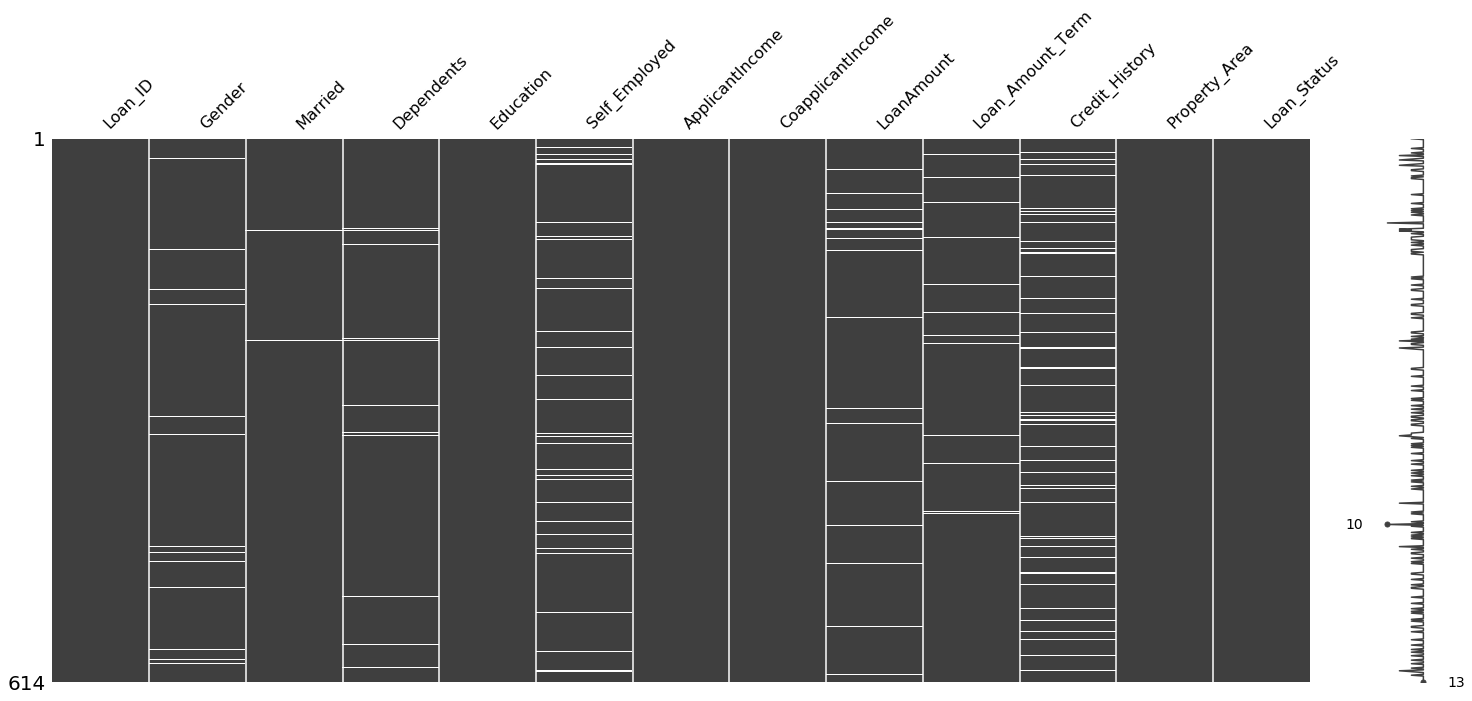

In [93]:
#chacking missing number
mns.matrix(train)

In [94]:
train.shape

(614, 13)

In [95]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0, 0.5, 'Count')

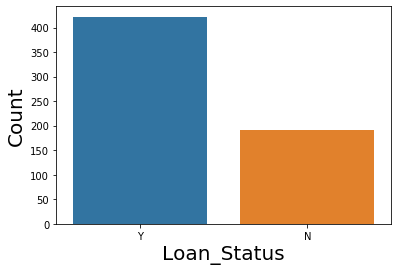

In [96]:
#let's checkout data is balanced on in balanced
g = sns.countplot(x="Loan_Status",data = train)
g.set_xlabel("Loan_Status",fontsize=20)
g.set_ylabel("Count",fontsize=20)

In [97]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [98]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

array(['0', '1', '2', '3+', nan], dtype=object)

## Features

### Catagorical features
   * Gender
   * Married
   * Dependents
   * Education
   * Self_Employed
   * Property_Area	
   * Loan_Amount_Term
   * Credit_History

### Ordinal features

### Quantitative Features
   * ApplicantIncome
   * CoapplicantIncome
   * LoanAmount

### target

   * Loan_Status

In [99]:
test['Loan_Status'] = -1
test.shape

(367, 13)

In [100]:
data = pd.concat((train,test),axis=0)
data.shape

(981, 13)

In [101]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
data.to_csv('../input/fulldata.csv')

In [103]:
categoricals = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']
numericals = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [104]:
data['Loan_Status'].unique()

array(['Y', 'N', -1], dtype=object)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [106]:
data.loc[:,categoricals] = data[categoricals].fillna('None').astype(str)

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null object
Education            981 non-null object
Self_Employed        981 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     981 non-null object
Credit_History       981 non-null object
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 107.3+ KB


In [108]:
data = data.fillna(0)


In [109]:
data.to_csv('../input/fulldata.csv')

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [110]:
data['Loan_Status'].describe()

count     981
unique      3
top         Y
freq      422
Name: Loan_Status, dtype: object

In [111]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,981.000000,981.000000,981.000000
mean,5179.795107,1601.916330,138.589195
std,5695.104533,2718.772806,79.831886
min,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,99.000000
50%,3800.000000,1110.000000,125.000000
75%,5516.000000,2365.000000,160.000000
max,81000.000000,41667.000000,700.000000


In [112]:
def OneHotEncoder_preprocessor(data,columns):
    """[summary]

    Args:
        data ([type]): [description]
        columns ([type]): [description]
        sparse (bool, optional): [description]. Defaults to False.

    Returns:
        [type]: [description]
    """
    for column in columns:
        # fill na with new category as none
        data.loc[:,column] = data[column].fillna('None')
    # initialize LabelEncoder
    ohe = preprocessing.OneHotEncoder(sparse=False)
    # fit label encoder and transform values on column
    ohe.fit(data[columns])
    # P.S do not use this directly .fit first, then transform
    data = ohe.transform(data[columns])
    return data

In [113]:
data = OneHotEncoder_preprocessor(data,categoricals)

In [85]:
type(data)

scipy.sparse.csr.csr_matrix

In [114]:
data

<981x35 sparse matrix of type '<class 'numpy.float64'>'
	with 7848 stored elements in Compressed Sparse Row format>